# Introduction

Le problème des mariages stables est au cœur de nombreuses procédures d'affectation, la plus connue en France étant probablement ParcourSup. Il y a dans ce problème deux types de joueurs (hommes/femmes, candidat(e)s/universités, ...), chaque joueur d'un type donnant ses préférences sur les joueurs de l'autre type (les universités classent les candidat(e)s par exemple). Le but est de trouver une affectation/un couplage vérifiant une propriété de stabilité.
L'algorithme le plus connu pour trouver une telle affectation est l'algorithme de Gale-Shapley. Nous nous intéressons dans ce projet non seulement coder les solutions en algorithme de Gale-Shapley et programmation linéaire, mais aussi étudier ce problème dans une situation dynamique : à chaque pas de temps nous réinitialise le nombre de l’homme et femme et on va trouvé une algorithme qui minimiser le changement de couples. 


# Different algorithmes used
- Gale-shapley (algo 1,2)
- Iteratif linear programmation
- Global linear programmation
    

# Description of files
- name_female.json, name_femal.json / csv : data of humans' name
- get_csv.py : turn files from json to csv
- gs.py : principal code of algorithmes Gale-shapley
- sm.py : principal file contains functions:
    - gennere_set_f_m
    - genere_pref_dyn
    - genere_instance 
    - calcul_difference_entre_gen
    - algo_1 
    - algo_2
    - lire_entree
    - choix_algo
- moplex.py, moplex_new.py : application of linear programmtion
- algo3.py : contains the function for the Iteratif linear programmation
- algo4.py : contains the function for the Global linear programmation
- interface.py : contains code for the interface

# Test
**Objet** : we want to study the value and time-cost evolution for these four algorithmes in a specifique situation

**Situation** : number male->max, number female from 1 to max

In [1]:
import os 
#if you want to know current working dir
os.getcwd()
#if you want to change
os.chdir('/Users/xinyuhuangmac/Google Drive/M1S2/Projet/Projet_SM')
# if you want to list dir
os.listdir()

['mogplex_new.py',
 'name_male.json',
 '.DS_Store',
 'study_test.py',
 'results.ipynb',
 'tt.py',
 'mogplex.py',
 'trash',
 'algo3.py',
 '__pycache__',
 'sm.py',
 'test.py',
 'name_male.csv',
 'algo4.py',
 'gs.py',
 'donne.csv',
 '.ipynb_checkpoints',
 'name_female.json',
 '.git',
 'main.py',
 'name_female.csv',
 'get_csv.py']

In [2]:
import os
from sm import *
import random
import time
import matplotlib.pyplot as plt

In [17]:


size_K=20
size_S=20



lt1,lt2,lt3,lt4=[],[],[],[]
lv1,lv2,lv3,lv4=[],[],[],[]

nb_for_generation=5
for i in range(5,(size_S+1)):
    K=[i]*i
    S=[j for j in range(1,i+1)]
    
    t=[0]*4
    sl1, sl2, sl3 ,sl4 = [], [], [], []
    import sys
    save_stdout = sys.stdout
    sys.stdout = open('trash', 'w')
    for j in range(nb_for_generation):
        female,male,s_f,s_m=gennere_set_f_m(i,i)
        ins=genere_instance(K,S, male, female, s_m, s_f)
        start = time.time()
        res1=calcul_difference_entre_gen(algo_1(deepcopy(ins)))
        stop = time.time()
        t[0]+=stop-start
        start = time.time()
        res2=calcul_difference_entre_gen(algo_2(deepcopy(ins)))
        stop = time.time()
        t[1]+=stop-start
        start = time.time()
        res3=calcul_difference_entre_gen(algo_3(deepcopy(ins)))
        stop = time.time()
        t[2]+=stop-start
        start = time.time()
        res4=prog_lineaire_advance(deepcopy(ins))
        stop = time.time()
        t[3]+=stop-start
        sl1.append(res1)
        sl2.append(res2)
        sl3.append(res3)
        sl4.append(res4)
    sys.stdout = save_stdout
    print("i==",i)
    lv1.append(sl1)
    lv2.append(sl2)
    lv3.append(sl3)
    lv4.append(sl4)
    lt1.append(np.mean(t[0]))
    lt2.append(np.mean(t[1]))
    lt3.append(np.mean(t[2]))
    lt4.append(np.mean(t[3]))

"""
1. codes utilisables (commente, readme, facilise pour l'utilisation->interface)
2. test
    n = 4
    homme=max femme=range(1,max)
    1) temps de calcul en fonction de n (courbe temps de calcul)
    2) valeurs des algorithme alg1/alg4 .....
        - moyenne, pire cas, courbe en fonction de n
    3) ALGO4:
        xijt en reel ->relaxation continue

    18 mai/23,24 mai
"""

i== 5
i== 6
i== 7
i== 8
i== 9
i== 10
i== 11
i== 12
i== 13
i== 14
i== 15
i== 16
i== 17
i== 18
i== 19
i== 20


'print(lv1)\nplt.plot(S,lt1, label="algo1")\nplt.plot(S,lt2, label="algo1")\nplt.plot(S,lt3, label="algo1")\nplt.plot(S,lt4, label="algo1")\nplt.legend()\nplt.show()\n'

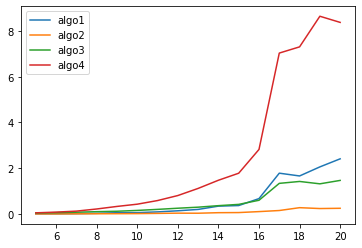

In [18]:
Lg=[i for i in range(5,(size_S+1))]
plt.plot(Lg,lt1, label="algo1")
plt.plot(Lg,lt2, label="algo2")
plt.plot(Lg,lt3, label="algo3")
plt.plot(Lg,lt4, label="algo4")
plt.legend()
plt.show()

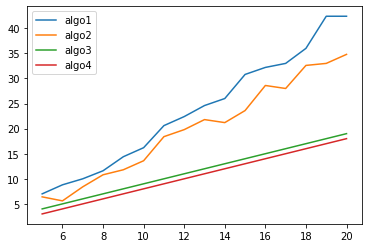

In [19]:
plt.plot(Lg,np.mean(lv1,axis=1), label="algo1")
plt.plot(Lg,np.mean(lv2,axis=1), label="algo2")
plt.plot(Lg,np.mean(lv3,axis=1), label="algo3")
plt.plot(Lg,np.mean(lv4,axis=1), label="algo4")
plt.legend()
plt.show()

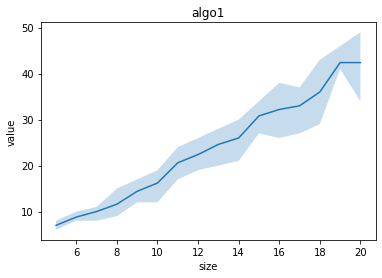

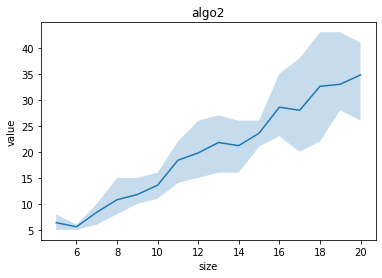

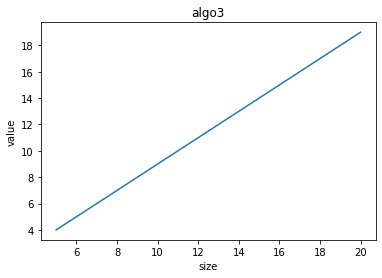

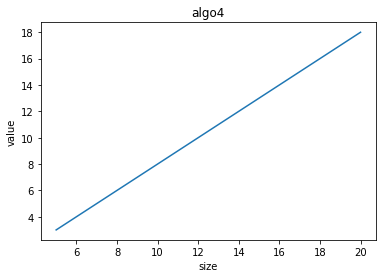

In [38]:
nb_algo=1
for l in [lv1, lv2, lv3, lv4]:
    max_v=np.max(l,axis=1)
    min_v=np.min(l,axis=1)
    plt.fill_between(Lg, max_v,min_v, alpha=0.25, linewidth=0,)
    plt.plot(Lg,np.mean(l,axis=1))
    plt.title("algo"+str(nb_algo))
    plt.xlabel("size")
    plt.ylabel("value")
    plt.show()
    nb_algo+=1


In [4]:
size_K=40
size_S=40



new_lt=[]
new_lv=[]

nb_for_generation=5
for i in range(5,(size_S+1)):
    K=[i]*i
    S=[j for j in range(1,i+1)]
    
    t=[]
    sl1new=[]
    import sys
    save_stdout = sys.stdout
    sys.stdout = open('trash', 'w')
    for j in range(nb_for_generation):
        female,male,s_f,s_m=gennere_set_f_m(i,i)
        ins=genere_instance(K,S, male, female, s_m, s_f)
        start = time.time()
        res1=calcul_difference_entre_gen(algo_1(deepcopy(ins)))
        stop = time.time()
        t.append(stop-start)
        sl1new.append(res1)

    sys.stdout = save_stdout
    print("i==",i)
    new_lv.append(sl1new)
    new_lt.append(np.mean(t))

i== 5
i== 6
i== 7
i== 8
i== 9
i== 10
i== 11
i== 12
i== 13
i== 14
i== 15
i== 16
i== 17
i== 18
i== 19
i== 20
i== 21
i== 22
i== 23
i== 24
i== 25
i== 26
i== 27
i== 28
i== 29
i== 30
i== 31
i== 32
i== 33
i== 34
i== 35
i== 36
i== 37
i== 38
i== 39
i== 40


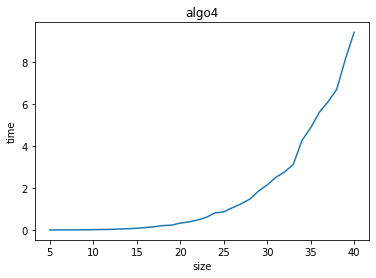

In [7]:
Lg=[i for i in range(5,(size_S+1))]
plt.plot(Lg,new_lt)
plt.title("algo1")
plt.xlabel("size")
plt.ylabel("time")
plt.show()

In [13]:
size_K=30
size_S=30



new_lt=[]
new_lv=[]

nb_for_generation=5
for i in range(5,(size_S+1)):
    K=[i]*i
    S=[j for j in range(1,i+1)]
    
    t=[]
    sll_new4=[]
    import sys
    save_stdout = sys.stdout
    sys.stdout = open('trash', 'w')
    for j in range(nb_for_generation):
        female,male,s_f,s_m=gennere_set_f_m(i,i)
        ins=genere_instance(K,S, male, female, s_m, s_f)
        start = time.time()
        res44=prog_lineaire_advance(deepcopy(ins))
        stop = time.time()
        t.append(stop-start)
        sll_new4.append(res44)

    sys.stdout = save_stdout
    print("i==",i)
    new_lv.append(sll_new4)
    new_lt.append(np.mean(t))

i== 5
i== 6
i== 7
i== 8
i== 9
i== 10
i== 11
i== 12
i== 13
i== 14
i== 15
i== 16
i== 17
i== 18
i== 19
i== 20
i== 21
i== 22
i== 23
i== 24
i== 25
i== 26
i== 27
i== 28
i== 29
i== 30


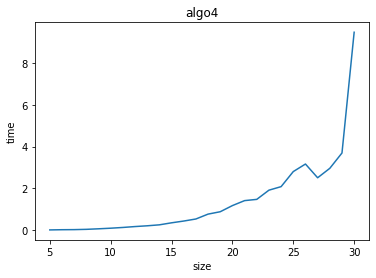

In [14]:
Lg=[i for i in range(5,(size_S+1))]
plt.plot(Lg,new_lt)
plt.title("algo4")
plt.xlabel("size")
plt.ylabel("time")
plt.show()

In [4]:
from gs import Gale_Shapley
from gurobipy import *

def alg_4_relaxation(list_instance):
    """
    :param :list_instance : list of qua-tuplets contaning
        - male_i/female_i : list of males/females for t=i
        - pm_i/pf_i : dictionary of preference for t=i
    Principe de l'algo:
    #Methode: PL
    #Variable:
        - x_{ij}^{t} -> variable xij a l'instant t
        - z_{ij}^{t} valeur a minimiser
    #Valeur de variable:
        - 1 si xij forme une couple a l'instant t
        - 0 sinon
    #Fonction objective:
        Min sum zijt
    #Contraintes:
        - pour tout t, sum xij sur i ou j soit inf a 1 (mariage)
        - zijt>=xijt - xij{t-1}
        - zijt>=0
        - xijt>=0
        - xijt<=1
        - for all t sum xij should be == to min(nbmale, nbfemale)
    #Advantage:
        -Comparer a l'algo iterative, resoudre le problem en une seule iteration
        -Resoudre le problem de facon gloable qui minimise la difference gloable

    :return : value of difference of couples betweens generations
    """
    nb_m=0 # total nomber of males
    nb_f=0 # total nomber of females
    list_m=[]
    list_f=[]
    duree_t=0 # number of generations

    # count number of generations and males/females
    for instance_t in list_instance:
        a,b,_,_=instance_t
        lg_a=len(a)
        lg_b=len(b)
        duree_t+=1
        if lg_a>nb_m:
            list_m=a
            nb_m=lg_a
        if lg_b>nb_f:
            list_f=b
            nb_f=lg_b


    # Couples for the first generation are generated by gale shapley
    male_i,female_i,pm_i, pf_i=list_instance[0]
    mariage_avant=Gale_Shapley(male_i,female_i,pm_i,pf_i)


    # convert couples into a matrix that x[i][j]=1 means the i-th male and j-th female form a couple in the first generation
    matrix_mariage=[]
    for j in range(nb_m):
        sous_matrix=[]
        for k in range(nb_f):
            if (list_m[j],list_f[k]) in mariage_avant:
                print(male_i[j],female_i[k])
                sous_matrix.append(1)
            else:
                sous_matrix.append(0)
        matrix_mariage.append(sous_matrix)

    #number of variable :xijt and zijt and t should be duree_t-1 because we generated manuelly the first generation
    nbvar=nb_m*nb_f*(duree_t-1)*2
    nbcont=nb_m*duree_t + nb_f*duree_t + nb_m*nb_f*(duree_t-1)*2 +nb_m*nb_f*duree_t



    lignes = range(nbcont)
    colonnes = range(nbvar)
    m = Model("mogplex")

    # declaration variables de decision
    x = []
    for nn in ([0,1]):
        for i in range(nb_m):
            sous_list=[]
            for j in range(nb_f):
                ss_list=[]
                for k in range(duree_t-1):
                    ss_list.append(m.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"x{i+1:d}{j+1:d}{k+1:d}" ))
                sous_list.append(ss_list)
            x.append(sous_list)
    print(len(x),len(x[0]),len(x[0][0]))

    m.update()
    obj = LinExpr();
    obj =0


    # Generation of seconde member : variables correspondding to zijt=1, else 0
    c=[]
    for nn in ([0,1]):
        for i in range(nb_m):
            sous_list=[]
            for j in  range(nb_f):
                ss_list=[]
                for k in range(duree_t-1):
                    ss_list.append(nn)
                sous_list.append(ss_list)
            c.append(sous_list)

    # Generation of objectif function
    for i in range(nb_m*2):
        for j in  range(nb_f):
            for k in range(duree_t-1):
                obj += c[i][j][k] * x[i][j][k]

    m.setObjective(obj,GRB.MINIMIZE)

    #1-pour tout t, sum xij sur i ou j soit inf a 1 (mariage)
    for t in range(duree_t-1):
        for i in range(nb_m):
            m.addConstr(quicksum(x[i][j][t] for j in [y for y in range(nb_f)]) <= 1, "Contrainte%d" % i)
    for t in range(duree_t-1):
        for j in range(nb_f):
            m.addConstr(quicksum(x[i][j][t] for i in [y for y in range(nb_m)]) <= 1, "Contrainte%d" % i)
    #2 zijt>=xijt - xij{t-1}
    #1) Le cas initial
    for i in range(nb_m):
        for j in range(nb_f):
            m.addConstr(x[i+nb_m][j][0] >= x[i][j][0]-matrix_mariage[i][j], "Contrainte%d" % i)
    #2) Le cas general
    for i in range(nb_m):
        for j in range(nb_f):
            for t in range(1,duree_t-1):
                m.addConstr(x[i+nb_m][j][t] >= x[i][j][t]-x[i][j][t-1], "Contrainte%d" % i)
    #3)- zijt>=0
    #  - xijt>=0
    #  - xijt<=1
    for i in range(nb_m):
        for j in range(nb_f):
            for t in range(duree_t-1):
                m.addConstr(x[i][j][t] >= 0, "Contrainte%d" % i)
                m.addConstr(x[i][j][t] <= 1, "Contrainte%d" % i)
                m.addConstr(x[i+nb_m][j][t] >= 0, "Contrainte%d" % i)

    #4)- for all t sum xij should be == to min(nbmale, nbfemale)
    for t in range(duree_t-1):
        a,b,_,_=list_instance[t]
        valmin=min(len(a),len(b))
        print(valmin)
        m.addConstr(quicksum(x[i][j][t] for i in [x for x in range(nb_m)] for j in [ y for y in range(nb_f)] ) <=valmin, "Contrainte%d" % i)
        m.addConstr(quicksum(x[i][j][t] for i in [x for x in range(nb_m)] for j in [ y for y in range(nb_f)] ) >=valmin, "Contrainte%d" % i)

    m.optimize()


    """
    print("")
    print('Solution optimale:')
    for nn in ([0,1]):
        for i in range(nb_m):
            for j in range(nb_f):
                for k in range(duree_t-1):
                    print(f"x{i+1+nn*nb_m:d}_{j+1:d}_{k+1:d}", '=', x[nn*nb_m+i][j][k].x)
    print("")
    print('Valeur de la fonction objectif :', m.objVal)
    """
    # Generate couples
    couple=[]
    for k in range(duree_t-1):
        couple_k=[]
        for i in range(nb_m):
            for j in range(nb_f):
                if x[i][j][k].x==1:
                    couple_k.append((list_m[i],list_f[j]))
        couple.append(couple_k)

    return int(m.objVal)


In [5]:
size_K=20
size_S=20


#new_lt1=[]
#new_lt2=[]
new_lv1=[]
new_lv2=[]

nb_for_generation=5
for i in range(5,(size_S+1)):
    K=[i]*i
    S=[j for j in range(1,i+1)]
    
    t=[]
    sl1new1=[]
    sl1new2=[]
    import sys
    save_stdout = sys.stdout
    sys.stdout = open('trash', 'w')
    for j in range(nb_for_generation):
        female,male,s_f,s_m=gennere_set_f_m(i,i)
        ins=genere_instance(K,S, male, female, s_m, s_f)
        #start = time.time()
        res11=prog_lineaire_advance(deepcopy(ins))
        res22=alg_4_relaxation(deepcopy(ins))
        #stop = time.time()
        #t.append(stop-start)
        sl1new1.append(res11)
        sl1new2.append(res22)
    print("i==",i)
    sys.stdout = save_stdout
    new_lv1.append(sl1new1)
    new_lv2.append(sl1new2)


In [9]:
print(new_lv1)
print(new_lv2)

[[3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [10, 10, 10, 10, 10], [11, 11, 11, 11, 11], [12, 12, 12, 12, 12], [13, 13, 13, 13, 13], [14, 14, 14, 14, 14], [15, 15, 15, 15, 15], [16, 16, 16, 16, 16], [17, 17, 17, 17, 17], [18, 18, 18, 18, 18]]
[[3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [7, 7, 7, 6, 7], [8, 7, 8, 8, 7], [9, 9, 9, 9, 9], [10, 10, 10, 10, 10], [10, 11, 10, 11, 11], [12, 12, 12, 12, 11], [13, 12, 13, 12, 13], [14, 13, 14, 13, 14], [14, 15, 15, 15, 14], [15, 16, 16, 16, 16], [17, 16, 17, 17, 16], [18, 17, 18, 18, 17]]


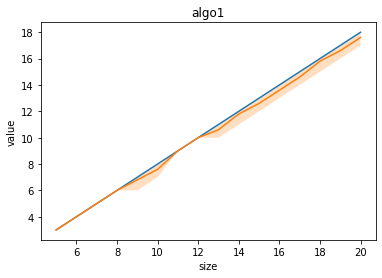

In [12]:
Lg=[i for i in range(5,(size_S+1))]


max_v1=np.max(new_lv1,axis=1)
min_v1=np.min(new_lv1,axis=1)
max_v2=np.max(new_lv2,axis=1)
min_v2=np.min(new_lv2,axis=1)

plt.fill_between(Lg, max_v1,min_v1, alpha=0.25, linewidth=0,)
plt.plot(Lg,np.mean(new_lv1,axis=1))

plt.fill_between(Lg, max_v2,min_v2, alpha=0.25, linewidth=0,)
plt.plot(Lg,np.mean(new_lv2,axis=1))
plt.title("algo"+str(nb_algo))
plt.xlabel("size")
plt.ylabel("value")
plt.show()
nb_algo+=1

# Conclusion

For the test in the situation : number male->max, number female from 1 to max, we can notice some property:

**1.** It exites a difference between algo1 and algo2:
- we can find out that the time and value for algo2 is always better than algo1 which alppy the same algorithm(Gale-shapley)

**Explanation** It's due to the algo2 is female optimal thatoptimizing female side that once females find there couples, algos stop, with |female|<=|male. And also, the vallue for algo2 is better that algo 1 because every time when female choose, she has the entire list of preference (40) meanwhile the preference list for male is incomplete so that males are more likey to change couples.

**2.** Algo3 and algo4 return the same value for difference between generations

**Explanation** This is due to th concept of algorithm 3, we want to avoid divorcement so each time when we add a female, we fix a couple between she and another male, grace to the proprety of S, the number of females is crossant so we don't need to make divorcement, so the value is minimum as  algo4. However, algo4 is more complicated than algo3 in terms of complexity so we need to use algo3 instead of algo4.

**3.** The number of size should be less than 25/30

**Explanation** From two figures of time-cost evolution, we can find out that time-cost increase exponentially from 25/30 which may cost a lot of time and computation with bad efficency.